In [33]:
import numpy as np
import matplotlib.pyplot as plt

OneMax is a benchmark problem, and is used to test that an optimiser can optimise. A benchmark is the act of running a computer program, a set of programs, or other operations, in order to assess the relative performance of an object, normally by running a number of standard tests and trials against it. In
the case of a benchmark problem we know what the answer is, so can check that the optimiser arrives at the optimal point. 

The goal of OneMax is to find the bit string in which all bits are “1”s. The optimiser doesn’t know this,
and so its task is to generate new potential solutions and find the one that best solves the problem according
to the fitness function. The first thing to do is implement the fitness function, which you can do as follows:

In [34]:
def onemax(x):
    return x.sum()

The argument x is a Numpy array of 1s and 0s. This fitness function returns the sum of the bits – so in the
case when all bits are set to 1, the optimal solution, the sum of the bits will be as high as it can be.

Having defined a fitness function, you’ll need a mutation operator. For this we’ll be using bit flip operator, which functions by selecting a random bit and flipping it. If it starts off as a 1 it becomes 0, and if it’s a 0
to start with it becomes 1.

In [35]:
class BitFlipMutation :
    def mutate(self, x):
        idx = np.random.randint(x.size) #selects a random integer from 0 to len(x)-1.
        xp = x.copy() #Creates a copy of the original solution, so we don’t modify x directly.
        xp[idx] = abs(1-x[idx]) #ensures the result is always non-negative (Bit flip happens here)
        return xp

Now that we have a fitness function and mutation operator we can construct the function that will perform a
single iteration of the optimiser. The function follows these steps:
1. Mutate the current solution to create a new child.
2. Evaluate the child solution under the fitness function.
3. Compare the parent and child solution – if the selection criterion is met then keep the child. Otherwise
revert to the parent for the next iteration.
4. Log the retained solution’s fitness in an archive.

In [36]:
def evolve(x, y, fitfunc, mutation, compare, A):
    xp = mutation.mutate(x)
    yp = fitfunc(xp)
    
    if not compare(y, yp):
        x = xp
        y = yp
    
    A.append(y)
    return x, y, A

We’re using a function called compare to do our solution selection. In this case it’s a simple check to see if the child is greater than or equal to the parent. 

Here is the greaterThanEqualTo function:

In [37]:
def greaterThanOrEqual(u, v):
    return u>= v

The last step in constructing your optimiser is to build the optimise function, which initiates the optimisation process and returns the result. It looks like this:

In [38]:
def optimise(D, fitfunc, mutation, ngens, compare):
    x = np.random.randint(0, 2, D) #Generates random integers of values between 0 to 2 - 1 of length D
    y = fitfunc(x)
    
    archive = []
    
    for gen in range(ngens):
        x, y, archive = evolve(x, y, fitfunc, mutation, compare, archive)
        
    return x, y, archive

Having constructed the optimiser and its associated functions you can run it as follows (for a problem with 10 bits):

[1 1 1 1 1 1 1 1 1 1] 10
[np.int64(8), np.int64(8), np.int64(8), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(9), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10), np.int64(10)]


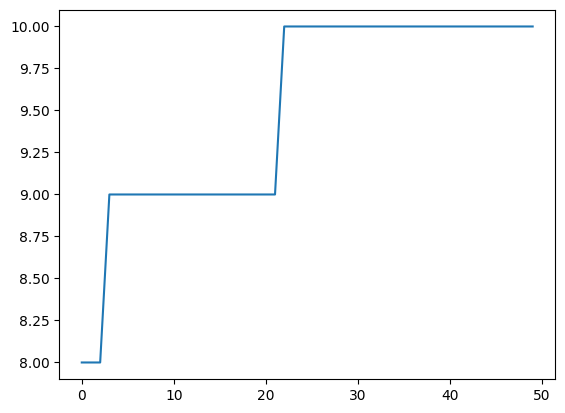

In [39]:
x, y, ylist = optimise(10, onemax, BitFlipMutation(), 50, greaterThanOrEqual)
print(x, y)
print(ylist) #This is a shortcut when you only give y-values. In this case: 
             #x-values are automatically generated as [0, 1, 2, 3, ...].
plt.plot(ylist)
plt.show()

# Average fitness in each iteration

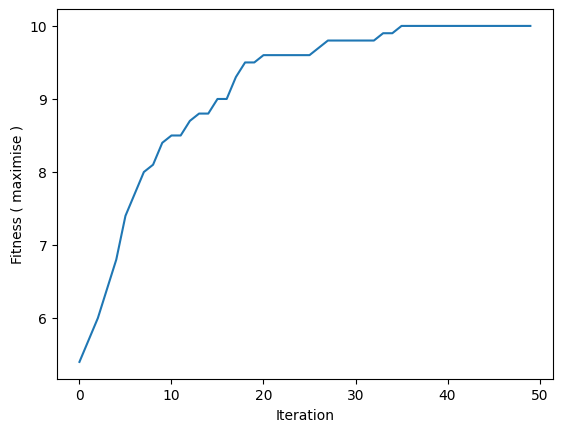

In [40]:
totalfitness =[]

for i in range(10):
    x, y, ylist = optimise(10, onemax, BitFlipMutation(), 50, greaterThanOrEqual)
    totalfitness.append(ylist)

totalfitness = np.array(totalfitness)

plt.figure()
plt.plot (totalfitness.mean(axis =0)) #axis=0 only does it columnwise rather than row wise
plt.xlabel("Iteration")
plt.ylabel("Fitness ( maximise )")
plt.show()

# Mutation Operators

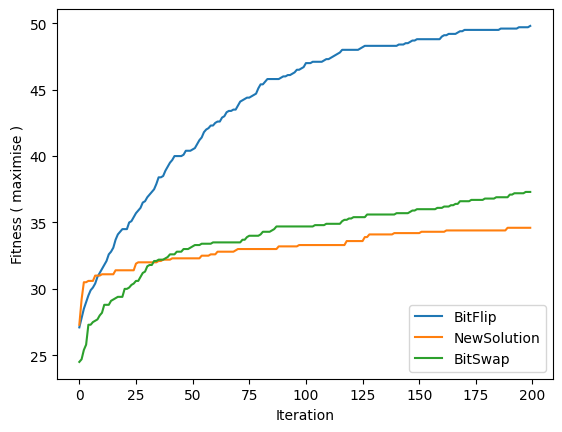

In [41]:
class NewSolution:
    def mutate(self, x):
        return np.random.randint(0, 2, x.size)

class BitSwap:
    def mutate(self, x):
        idx , jdx = sorted(np.random.randint(0, x.shape[0], 2))
        xp = x.copy()
        xp[idx:jdx] = abs(1 - x[idx:jdx])
        return xp

totalfitness =[]

for i in range(10):
    x, y, ylist = optimise(50, onemax, BitFlipMutation(), 200, greaterThanOrEqual)
    totalfitness.append(ylist)

totalfitness = np.array(totalfitness)

plt.figure()
plt.plot (totalfitness.mean(axis =0),label = "BitFlip") 
plt.xlabel("Iteration")
plt.ylabel("Fitness ( maximise )")

totalfitness =[]

for i in range(10):
    x, y, ylist = optimise(50, onemax, NewSolution(), 200, greaterThanOrEqual)
    totalfitness.append(ylist)

totalfitness = np.array(totalfitness)

plt.plot (totalfitness.mean(axis =0),label = "NewSolution") 

totalfitness =[]

for i in range(10):
    x, y, ylist = optimise(50, onemax, BitSwap(), 200, greaterThanOrEqual)
    totalfitness.append(ylist)

totalfitness = np.array(totalfitness)

plt.plot (totalfitness.mean(axis =0),label = "BitSwap") 

plt.legend(loc=4)

# Leading ones

In [53]:
def leadingOnes(x):
    count = 0
    for i in range(x.shape[0]):
        if x[i] == 0:
            return count
    count = count + 1
    return count

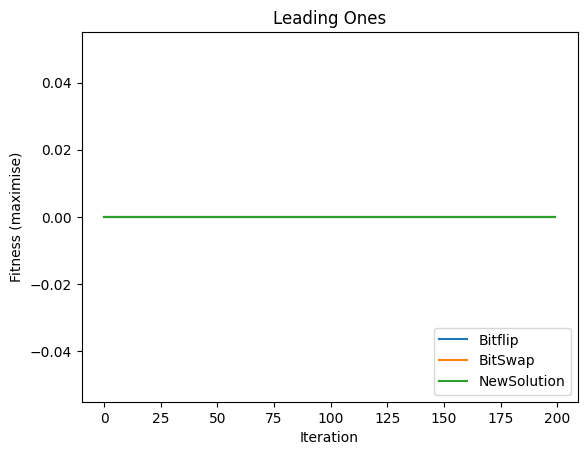

In [54]:
def experiment (fitfunc , title):
    mutstrs = ["Bitflip", "BitSwap", "NewSolution"]
    muts = [BitFlipMutation(), BitSwap(), NewSolution()]
    
    plt.figure()
    
    for mut , mutstr in zip( muts , mutstrs ):
        Ys = []
        for repeat in range(11):
            x , y , ylist = optimise(50 , fitfunc, mut , 200 , greaterThanOrEqual)
            Ys.append ( ylist )
        Ys = np.array(Ys)
        
        plt.plot(Ys.mean(axis =0), label = mutstr)
        
    plt.title(title)
    plt.xlabel ("Iteration")
    plt.ylabel ("Fitness (maximise)")
    plt.legend (loc=4)

experiment(leadingOnes, "Leading Ones")

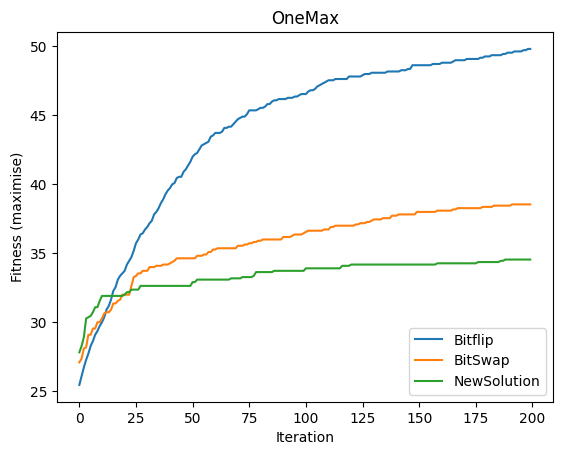

In [55]:
experiment(onemax, "OneMax")